In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [60]:
np.set_printoptions(suppress=True)  # 不适用科学计数法

In [42]:
x = np.array([8.19,2.72,6.39,8.71,4.7,2.66,3.78])
y = np.array([7.01,2.78,6.47,6.71,4.1,4.23,4.05])

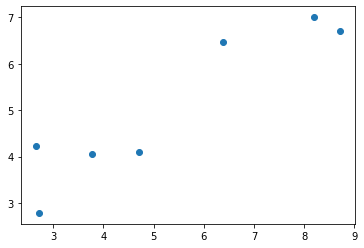

In [43]:
plt.figure()
plt.scatter(x, y)

### 方法一：利用Scipy.leastsq进行拟合

In [44]:
from scipy.optimize import leastsq

In [45]:
# 定义最小二乘函数
def err(p, x, y):
    return p[0] * x + p[1] - y

In [46]:
p0 = [1, 1]  #设置参数初始值，可以随意设置
ret = leastsq(err, p0, args=(x,y))

In [47]:
k,b = ret[0]
print('k=',k)
print('b=',b)

k= 0.6134953486733113
b= 1.7940925476610339


In [48]:
x1 = np.linspace(0,8,100)
y1 = k * x1 + b

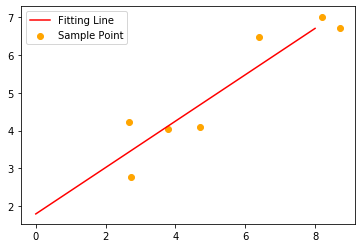

In [49]:
plt.scatter(x, y, color="orange",label='Sample Point')
plt.plot(x1,y1,color='red',label='Fitting Line')
plt.legend()

### 方法二：利用sklearn进行拟合

In [50]:
from sklearn.linear_model import LinearRegression

In [51]:
reg = LinearRegression()

In [66]:
x2 = x.reshape(-1,1)
y2 = y.reshape(-1,1)

In [67]:
reg.fit(x2,y2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [68]:
reg.intercept_

array([1.79409255])

In [69]:
reg.coef_

array([[0.61349535]])

### 方法三：利用statsmodels进行拟合

In [1]:
import statsmodels.api as sm

In [58]:
x3 = x
y3 = y
X = sm.add_constant(x3)  # 添加截距项
est = sm.OLS(y3,X)  # 最小二乘法
est2 = est.fit()

In [59]:
est2.summary()

C:\Users\18210\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     31.46
Date:                Sat, 25 Apr 2020   Prob (F-statistic):            0.00249
Time:                        12:50:56   Log-Likelihood:                -5.9456
No. Observations:                   7   AIC:                             15.89
Df Residuals:                       5   BIC:                             15.78
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7941      0.633      2.833      0.037       0.166       3.422
x1             0.6135      0.109      5.609      0.002       0.332       0.895
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   3.087
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.717
Skew:                           0.291   Prob(JB):                        0.699
Kurtosis:                       1.544   Cond. No.                         14.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""